Targets (or labels) are the output values — what you’re trying to predict.
For the Iris dataset, the target represents the species of the iris flower.

There are 3 target classes:

0 → setosa  
1 → versicolor  
2 → virginica

In [ ]:
# Features and Targets: X contains the input data (features like petal length, width etc) and y contains the target values (species of the iris flower).

from sklearn.datasets import load_iris 
iris=load_iris()

x=iris.data
y=iris.target

features_names=iris.feature_names
target_names=iris.target_names

print("Feature names:",features_names)
print("Target names:",target_names)

print("\nType of X",type(x))
print("\nFirst 5 rows of X:\n",x[:5])



Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Type of X <class 'numpy.ndarray'>

First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.4)

print("x_train shape:",x_train.shape)
print("x_test:",x_test.shape)

print("y_train shape:\n",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (90, 4)
x_test: (60, 4)
y_train shape:
 (90,)
y_test shape: (60,)


In [22]:
from sklearn.preprocessing import LabelEncoder

categorical_feature=['cat','dog','dog','cat','bird']

encoder=LabelEncoder()

encoded_feature=encoder.fit_transform(categorical_feature)

print("Encoded feature:",encoded_feature)

Encoded feature: [1 2 2 1 0]


In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
#c2_feature=['cat','dog','dog','cat','bird']

c2_feature=np.array(categorical_feature).reshape(-1,1)
encode2=OneHotEncoder(sparse_output=False)

encoded_feature2=encode2.fit_transform(c2_feature)

print("OneHotEncoder feature:\n",encoded_feature)

OneHotEncoder feature:
 [1 2 2 1 0]


Logistic Regression is a classification algorithm — it predicts categories (like flower species) rather than continuous values.

max_iter=200 means the algorithm is allowed to perform up to 200 iterations while optimizing (finding the best model weights).

Sometimes, by default (100 iterations), the algorithm may not fully converge (reach optimal solution), so increasing to 200 ensures proper training.

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=200)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=200)

y_test → actual (true) species of flowers in the test set

y_prediction → predicted species from your model

metrics.accuracy_score(y_test, y_prediction) → compares both arrays and calculates the fraction of correct predictions

Formula:

Accuracy=Number of correct predictions/Total number of predictions
	​
For example:
If out of 30 test samples, your model correctly predicts 27:
Accuracy
=27/30=0.9=90%

In [29]:
y_prediction=log_reg.predict(x_test)

from sklearn import metrics
print("LogisticRegression model accurabcy:",metrics.accuracy_score(y_test,y_prediction))

LogisticRegression model accurabcy: 0.9666666666666667


In [ ]:
# Each flower has 4 values (because the Iris dataset has 4 features):

# sepal length
# sepal width
# petal length
# petal width

# So:
# [3, 5, 4, 2] → first flower’s measurements
# [2, 3, 5, 4] → second flower’s measurements
#The model uses the patterns it learned during training and returns numeric labels for each flower:

sample=[[3,5,4,2],[2,3,5,4]]
prediction=log_reg.predict(sample) #here 
predicted_species=[iris.target_names[p] for p in prediction]

print("prediction:",predicted_species)


prediction: ['virginica', 'virginica']


RAINFALL PRDICTION USING LINEAR REGRESSION 

dependent(rainfall)
independent(temperature,humidity)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean_Squared_Error: {0.049747708518265}
Root Mean Squared Error 0.2230419434058648
R-squared:0.16619844427894748


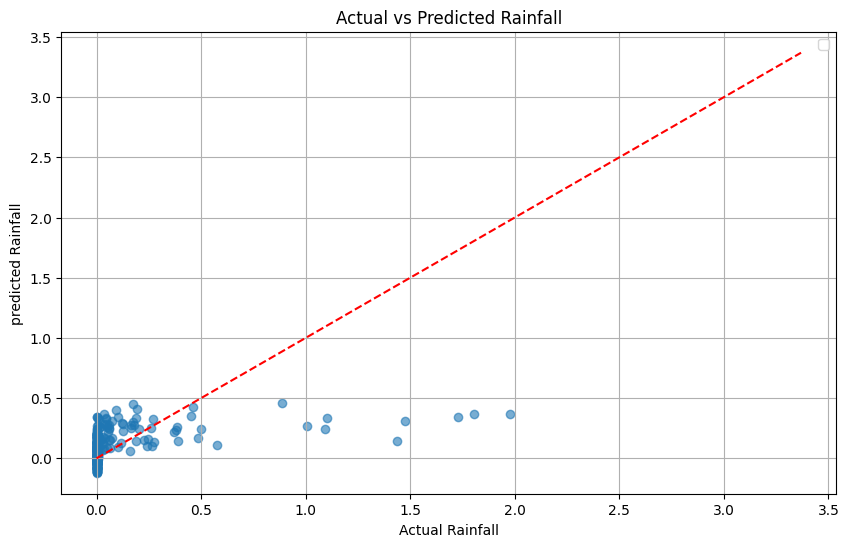

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


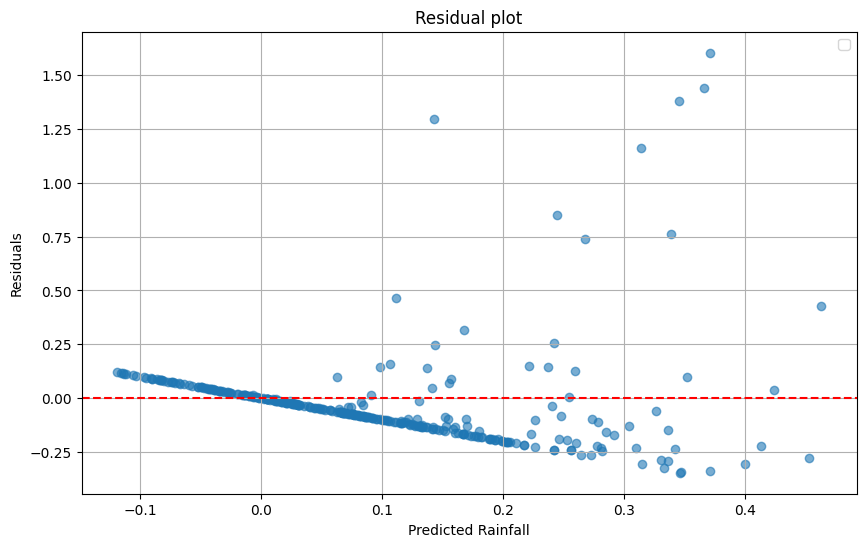

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import matplotlib.pyplot as plt

data=pd.read_csv("Austin-2019-01-01-to-2023-07-22.csv")

features=['tempmax','tempmin','humidity','dew']
target='precip'
data=data.dropna(subset=features+[target])

x=data[features]
y=data[target]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)

y_prediction=model.predict(x_test)

mse=mean_squared_error(y_test,y_prediction)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_prediction)

print(f"Mean_Squared_Error:",{mse}) #It allows you to insert variables directly into strings by using {} placeholders.
print(f"Root Mean Squared Error",rmse)
print(f"R-squared:{r2}")

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_prediction,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red',linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('predicted Rainfall')
plt.grid()
plt.legend()
plt.show()

residuals=y_test-y_prediction
plt.figure(figsize=(10,6))
plt.scatter(y_prediction,residuals,alpha=0.6)
plt.axhline(y=0,color='red',linestyle='--')

plt.title('Residual plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()


Excellent, Sandip 🌟 — this is a **complete linear regression workflow** using weather data!
Let’s go step by step — I’ll explain *each line clearly* so you understand what every part does.

---

## 📦 1. Importing Libraries

```python
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
```

### Explanation:

* **`numpy`** → used for numerical operations (like square roots, arrays, etc.)
* **`pandas`** → used for handling tabular data (reading CSV, manipulating columns)
* **`train_test_split`** → splits your dataset into training and testing parts
* **`LinearRegression`** → creates the linear regression model
* **`mean_squared_error`, `r2_score`** → used to measure model performance
* **`matplotlib.pyplot`** → used for plotting (visualizations)

---

## 📂 2. Load the dataset

```python
data = pd.read_csv("Austin-2019-01-01-to-2023-07-22.csv")
```

### Meaning:

* Reads the CSV file into a **pandas DataFrame** named `data`.
* Each column represents a feature (like temperature, humidity, etc.)
* Each row represents a record (daily weather data).

---

## 🌡️ 3. Define features and target

```python
features = ['tempmax', 'tempmin', 'humidity', 'dew']
target = 'precip'
```

### Meaning:

* **Features (X):** The independent variables used to make predictions.

  * Here: maximum temperature, minimum temperature, humidity, dew point.
* **Target (y):** The dependent variable (the one you want to predict).

  * Here: `precip` → precipitation (rainfall).

---

## 🧹 4. Handle missing data

```python
data = data.dropna(subset=features + [target])
```

### Meaning:

* Removes any rows that contain missing (`NaN`) values in any of the feature or target columns.
* Ensures the model only trains on complete data.

---

## ✂️ 5. Split features and target

```python
x = data[features]
y = data[target]
```

### Meaning:

* `x`: DataFrame containing only the feature columns
* `y`: Series containing the target column (rainfall)

---

## 🧪 6. Split into training and testing data

```python
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
```

### Meaning:

* Splits the data into:

  * **80% training data** → used to train the model
  * **20% test data** → used to evaluate how well the model performs on unseen data
* `random_state=42` ensures reproducibility (same split every time you run).

---

## 🧠 7. Create and train the model

```python
model = LinearRegression()
model.fit(x_train, y_train)
```

### Meaning:

* Creates a **Linear Regression model** object.
* `.fit()` → trains the model by finding the best-fit line that minimizes the error between predictions and actual rainfall values.

---

## 🔮 8. Make predictions

```python
y_prediction = model.predict(x_test)
```

### Meaning:

* Uses the trained model to predict rainfall (`precip`) for the test dataset.
* `y_prediction` will be an array of predicted values (continuous numbers).

---

## 📏 9. Evaluate the model

```python
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_prediction)
```

### Meaning:

* **`mse`** (Mean Squared Error): Measures the average squared difference between actual and predicted values.
  → Lower MSE = better performance.
* **`rmse`** (Root Mean Squared Error): The square root of MSE; shows average prediction error in the same units as `y`.
  → Easier to interpret.
* **`r2`** (R-squared): Tells how much variance in `y` is explained by the features.
  → Value between 0 and 1 (closer to 1 = better fit).

---

## 🖨️ 10. Print results

```python
print(f"Mean_Squared_Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
```

### Meaning:

* Displays your model’s performance metrics nicely using **f-strings** (formatted printing).

---

## 📈 11. Plot actual vs predicted rainfall

```python
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_prediction, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.grid()
plt.legend()
plt.show()
```

### Meaning:

* **Scatter plot**: each point = one test sample.

  * x-axis → actual rainfall
  * y-axis → predicted rainfall
* **Red dashed line** (`y=x`): perfect prediction line.
  → Points close to this line = good predictions.
* Helps visually check model accuracy.

---

## 📉 12. Plot residuals (errors)

```python
residuals = y_test - y_prediction
plt.figure(figsize=(10,6))
plt.scatter(y_prediction, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()
```

### Meaning:

* **Residuals** = difference between actual and predicted values.
* Plots residuals vs predicted values.
* Red line (`y=0`) = no error line.
  → If residuals are randomly scattered around 0, your model is performing well.
  → Patterns in residuals = possible problems (nonlinearity, missing variables, etc.)

---

## ✅ Summary of What This Code Does

| Step | Description                                |
| ---- | ------------------------------------------ |
| 1–2  | Import libraries & load dataset            |
| 3–4  | Select features and clean data             |
| 5–6  | Split into training and testing sets       |
| 7–8  | Train and predict with Linear Regression   |
| 9–10 | Evaluate model (MSE, RMSE, R²)             |
| 11   | Visualize actual vs predicted rainfall     |
| 12   | Visualize residuals to check model quality |

---

Would you like me to show how to **print model coefficients and intercept** (to interpret which features most affect rainfall)?
